In [1]:
import sys
import time
import importlib

import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
from loguru import logger
import matplotlib.pyplot as plt

sys.path.append("../src/pyproteomics/")
datetime = time.strftime("%Y%m%d_%H%M%S")
logger.remove()
logger.add(sys.stdout, format="<green>{time:HH:mm:ss.SS}</green> | <level>{level}</level> | {message}")

1

In [2]:
import imputation

# Test 3.1 defaults

In [6]:
adata = ad.read_h5ad("../data/testdata/test3_imputation/test3_input/adata_log2_cont_filter.h5ad")
adata = imputation.gaussian(adata=adata, qc_export_path="../data/testdata/test3_imputation/test3_output/gaussian_qc")
adata.write("../data/testdata/test3_imputation/test3_output/gaussian.h5ad")

15:20:07.72 | INFO | Starting imputation with Gaussian distribution version 2.0.0
15:20:07.72 | INFO | Imputation with Gaussian distribution PER PROTEIN
15:20:07.73 | INFO | Mean number of missing values per sample: 124.18 out of 3244 proteins
15:20:07.73 | INFO | Mean number of missing values per protein: 0.42 out of 11 samples
15:20:08.22 | INFO | Number of missing values after imputation: 0
15:20:08.23 | INFO | Imputation complete


## Test 3.2 another dataset

In [7]:
import helper

In [93]:
path_to_DIANN = "../tests/data/20241211_DIANN.pg_matrix.tsv" 
path_to_DIANN_metadata = "../tests/data/20241217_DIANN_metadata.csv"

adata = helper.DIANN_to_adata(
    DIANN_path = path_to_DIANN,
    metadata_path = path_to_DIANN_metadata,
    metadata_sep = ";",
    sample_id_column = "LCMS_run_id")

17:13:01.72 | INFO | DIANN_to_adata function started (v2.0)
17:13:01.73 | INFO | Step 1: Loading DIANN output file

17:13:01.86 | INFO | Step 2: Loading metadata file
17:13:01.86 | INFO | Step 3: Loading protein metadata
17:13:01.86 | INFO | For a total of 7030 proteins 

17:13:01.86 | INFO | Step 4: Creating anndata object:
AnnData object with n_obs × n_vars = 248 × 7030
    obs: 'File.Name', 'Precursors.Identified', 'Proteins.Identified', 'Total.Quantity', 'MS1.Signal', 'MS2.Signal', 'FWHM.Scans', 'FWHM.RT', 'Median.Mass.Acc.MS1', 'Median.Mass.Acc.MS1.Corrected', 'Median.Mass.Acc.MS2', 'Median.Mass.Acc.MS2.Corrected', 'MS2.Mass.Instability', 'Normalisation.Instability', 'Median.RT.Prediction.Acc', 'Average.Peptide.Length', 'Average.Peptide.Charge', 'Average.Missed.Tryptic.Cleavages', 'filename', 'Machine', 'Date', 'User_id', 'LC', 'Acquisition', 'Exp_id', 'Plate_384wp_id', '384wp_well_real', 'Vial', 'Vol_injected', '96wp_well', '96wp_id', 'Biopsy_type', 'RCN', 'RCN_long', 'replicate'

In [102]:
import importlib
importlib.reload(filtering)

<module 'filtering' from '/Users/jnimoca/Jose_BI/3_Python_Functions/PyProteomics/JupyterNotebooks/../src/pyproteomics/filtering.py'>

In [101]:
import filtering

In [103]:
adata_filtered = filtering.filter_invalid_proteins(adata)

17:16:34.87 | INFO | Filtering proteins, they need to have 70.0% valid values to be kept
17:16:34.88 | INFO | No grouping variable was provided
17:16:34.89 | DEBUG | adata has 248 samples and 7030 proteins
3969 proteins were kept
3061 proteins were filtered out


In [104]:
adata_imputed = imputation.gaussian(adata=adata_filtered, qc_export_path="../data/testdata/test3_imputation/test3_output/gaussian_qc_DIANN.csv")

17:16:52.03 | INFO | Starting imputation with Gaussian distribution version 2.0.0
17:16:52.04 | INFO | Imputation with Gaussian distribution PER PROTEIN
17:16:52.04 | INFO | Mean number of missing values per sample: 295.48 out of 3969 proteins
17:16:52.04 | INFO | Mean number of missing values per protein: 18.46 out of 248 samples
17:16:52.64 | INFO | Number of missing values after imputation: 0
17:16:52.64 | INFO | Imputation complete


In [ ]:
# Very Weird for some reason this works with first dataset but not with the second
# log transform does not change anything..

In [ ]:
#explore what is happening with the second dataset one line at a time

In [12]:
path_to_DIANN = "../tests/data/20241211_DIANN.pg_matrix.tsv" 
path_to_DIANN_metadata = "../tests/data/20241217_DIANN_metadata.csv"

adata = helper.DIANN_to_adata(
    DIANN_path = path_to_DIANN,
    metadata_path = path_to_DIANN_metadata,
    metadata_sep = ";",
    sample_id_column = "LCMS_run_id")

15:23:35.89 | INFO | DIANN_to_adata function started (v2.0)
15:23:35.89 | INFO | Step 1: Loading DIANN output file

15:23:36.00 | INFO | Step 2: Loading metadata file
15:23:36.01 | INFO | Step 3: Loading protein metadata
15:23:36.01 | INFO | For a total of 7030 proteins 

15:23:36.01 | INFO | Step 4: Creating anndata object:
AnnData object with n_obs × n_vars = 248 × 7030
    obs: 'File.Name', 'Precursors.Identified', 'Proteins.Identified', 'Total.Quantity', 'MS1.Signal', 'MS2.Signal', 'FWHM.Scans', 'FWHM.RT', 'Median.Mass.Acc.MS1', 'Median.Mass.Acc.MS1.Corrected', 'Median.Mass.Acc.MS2', 'Median.Mass.Acc.MS2.Corrected', 'MS2.Mass.Instability', 'Normalisation.Instability', 'Median.RT.Prediction.Acc', 'Average.Peptide.Length', 'Average.Peptide.Charge', 'Average.Missed.Tryptic.Cleavages', 'filename', 'Machine', 'Date', 'User_id', 'LC', 'Acquisition', 'Exp_id', 'Plate_384wp_id', '384wp_well_real', 'Vial', 'Vol_injected', '96wp_well', '96wp_id', 'Biopsy_type', 'RCN', 'RCN_long', 'replicate'

In [19]:
mean_shift=-1.8
std_dev_shift=0.3
perSample=False
qc_export_path=None

In [13]:
adata_copy = adata.copy()

In [14]:
df = pd.DataFrame(data = adata_copy.X, columns = adata_copy.var.index, index = adata_copy.obs_names)

In [15]:
df_raw = df.copy()

In [16]:
logger.info(f'Mean number of missing values per sample: {round(df.isnull().sum(axis=1).mean(),2)} out of {df.shape[1]} proteins')
logger.info(f'Mean number of missing values per protein: {round(df.isnull().sum(axis=0).mean(),2)} out of {df.shape[0]} samples')

15:27:25.37 | INFO | Mean number of missing values per sample: 2461.54 out of 7030 proteins
15:27:25.38 | INFO | Mean number of missing values per protein: 86.84 out of 248 samples


In [47]:
print(col_mean)
print(col_std)
print(num_nans)
print(mean_shift)

12510.139532163745
6419.098738863471
77
-1.8


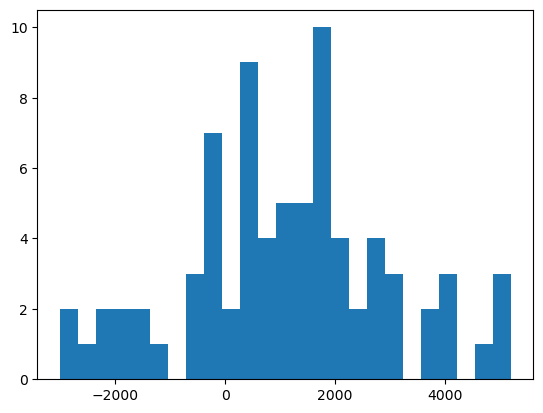

In [52]:
# Generate random values
random_values = np.random.normal(loc=(col_mean+(col_std*mean_shift)), scale=(col_std*0.3), size=num_nans)
plt.hist(random_values, bins=25)
plt.show()

In [ ]:
# so, at least for the first column we have found out that the math works out.
# however, we discovered that if the standard coefficient of variation is high enough the random values generated can be negative (this is not possible for protein values)
# we still need to figure out how is it that we still have NaNs in our datasets after the imputation, negative values are not NaNs

In [ ]:
# let's run it until we hit NaNs post imputation, and check that column

In [77]:
path_to_DIANN = "../tests/data/20241211_DIANN.pg_matrix.tsv" 
path_to_DIANN_metadata = "../tests/data/20241217_DIANN_metadata.csv"

adata = helper.DIANN_to_adata(
    DIANN_path = path_to_DIANN,
    metadata_path = path_to_DIANN_metadata,
    metadata_sep = ";",
    sample_id_column = "LCMS_run_id")



17:04:14.79 | INFO | DIANN_to_adata function started (v2.0)
17:04:14.79 | INFO | Step 1: Loading DIANN output file

17:04:14.91 | INFO | Step 2: Loading metadata file
17:04:14.91 | INFO | Step 3: Loading protein metadata
17:04:14.91 | INFO | For a total of 7030 proteins 

17:04:14.91 | INFO | Step 4: Creating anndata object:
AnnData object with n_obs × n_vars = 248 × 7030
    obs: 'File.Name', 'Precursors.Identified', 'Proteins.Identified', 'Total.Quantity', 'MS1.Signal', 'MS2.Signal', 'FWHM.Scans', 'FWHM.RT', 'Median.Mass.Acc.MS1', 'Median.Mass.Acc.MS1.Corrected', 'Median.Mass.Acc.MS2', 'Median.Mass.Acc.MS2.Corrected', 'MS2.Mass.Instability', 'Normalisation.Instability', 'Median.RT.Prediction.Acc', 'Average.Peptide.Length', 'Average.Peptide.Charge', 'Average.Missed.Tryptic.Cleavages', 'filename', 'Machine', 'Date', 'User_id', 'LC', 'Acquisition', 'Exp_id', 'Plate_384wp_id', '384wp_well_real', 'Vial', 'Vol_injected', '96wp_well', '96wp_id', 'Biopsy_type', 'RCN', 'RCN_long', 'replicate'

In [ ]:
adata_copy = adata.copy()
df = pd.DataFrame(data = adata_copy.X, columns = adata_copy.var.index, index = adata_copy.obs_names)

# Iterate over each column in the DataFrame
for col in df.columns:
    

    # Calculate the mean and standard deviation for the column (protein values)
    col_mean = df[col].mean(skipna=True)
    col_stddev = df[col].std(skipna=True)
    # Identify NaN positions in the column
    nan_mask = df[col].isnull()
    num_nans = nan_mask.sum() 
    # Generate random values from a normal distribution       
    shifted_random_values = np.random.normal(
        loc=(col_mean + (mean_shift * col_stddev)), 
        scale=(col_stddev * std_dev_shift), 
        size=num_nans)
    
    #check if any value in array is NaN
    if np.nan in shifted_random_values:
        print("NaNs in random values")
        print(col)
        
    # Replace NaNs in the column with the generated random values
    df.loc[nan_mask, col] = shifted_random_values


df.isnull().sum().sum()

np.int64(20748)

In [79]:
df.head()

Protein.Group,A0A024R1R8;Q9Y2S6,A0A075B6I0,A0A075B6K4,A0A075B6K5,A0A075B6P5;P01615,A0A075B6Q5,A0A075B6R9;A0A0C4DH68,A0A075B6S2,A0A075B6S5;A0A0C4DH67;A0A0C4DH69,A0A075B7B8,...,Q9Y6R4,Q9Y6R7,Q9Y6U3,Q9Y6V7,Q9Y6W3,Q9Y6W5,Q9Y6X3,Q9Y6X5,Q9Y6X9,Q9Y6Y8
LCMS_run_id,,,,,,,,,,,,,,,,,,,,,
8550,13364.200000,-8377.187474,-8679.979589,83429.3,65607.7,-12714.570992,-2463.612444,126706.0,125688.0,-20340.904402,...,3004.199050,12835.700000,-1764.524334,4181.150969,5441.480000,39037.8,3575.000000,4217.99,2955.021280,19015.900000
8549,16060.400000,24121.100000,-9124.624057,106445.0,133782.0,7522.780000,22015.500000,302754.0,98833.9,82698.100000,...,2720.922732,23327.600000,2110.776139,3433.062691,2488.009664,29610.7,3709.380000,4550.10,4548.597174,17180.600000
8559,1176.746423,-17882.886516,-15831.656135,35072.0,74421.8,-15899.570155,-10588.567260,115321.0,23076.0,26153.300000,...,2775.730756,-21000.129011,-1981.267115,3015.142354,2112.591857,29842.7,1825.689572,4276.24,2421.147665,-3249.802466
8617,26018.900000,13639.500000,-7055.933439,28348.2,30827.8,-13613.685774,-7117.393945,94934.1,13716.3,-23516.006592,...,4287.520000,-21856.680393,-3959.896560,6972.380000,7723.390000,58269.8,6740.150000,5478.59,2980.077099,18701.400000
8555,1150.724957,93004.400000,27039.000000,85028.4,76597.0,-7121.611841,17081.700000,155076.0,32218.1,-29645.305352,...,2911.026659,14641.500000,22480.800000,2612.840511,6987.340000,39377.1,7190.470000,4031.86,2064.878389,16759.500000


In [80]:
df['A0A1B0GUV8']

LCMS_run_id
8550   NaN
8549   NaN
8559   NaN
8617   NaN
8555   NaN
        ..
8455   NaN
8454   NaN
8453   NaN
8452   NaN
8451   NaN
Name: A0A1B0GUV8, Length: 248, dtype: float64

In [ ]:
index

In [74]:
#what happens if only one value in imputation available, no mean can be calculated, no stddev can be calculated, no random values can be generated

np.int64(20748)

In [ ]:
df

In [82]:
adata_copy = adata.copy()
df = pd.DataFrame(data = adata_copy.X, columns = adata_copy.var.index, index = adata_copy.obs_names)

In [87]:
np.isnan(df['A0A1B0GUV8']).sum() / df['A0A1B0GUV8'].shape[0]

np.float64(0.9959677419354839)

In [88]:
#how many non nan values do we have in the column
df['A0A1B0GUV8'].notnull().sum()

np.int64(1)

In [89]:
df['A0A1B0GUV8'].mean()

np.float64(51649.8)

In [90]:
# Iterate over each column in the DataFrame
col = 'A0A1B0GUV8'

# Calculate the mean and standard deviation for the column (protein values)
col_mean = df[col].mean(skipna=True)
print(col_mean)
col_stddev = df[col].std(skipna=True)
print(col_stddev)

51649.8
nan


In [ ]:
# Identify NaN positions in the column
nan_mask = df[col].isnull()
num_nans = nan_mask.sum()

In [92]:
50 * np.nan

nan

In [ ]:
# the issue is that when the data only has a single value, the standard deviation is NaN, and then the random values are NaN....
# I wonder if these issues are gone with filtering... 

In [ ]:

# Generate random values from a normal distribution       
shifted_random_values = np.random.normal(
    loc=(col_mean + (mean_shift * col_stddev)), 
    scale=(col_stddev * std_dev_shift), 
    size=num_nans)
    
# Replace NaNs in the column with the generated random values
df.loc[nan_mask, col] = shifted_random_values

df.isnull().sum().sum()

# Test 3.3 still fails

In [6]:
adata = ad.read_h5ad("../tests/data/adata_fails_imputation.h5ad")

In [9]:
adata_copy = adata.copy()
df = pd.DataFrame(data = adata_copy.X, columns = adata_copy.var.index, index = adata_copy.obs_names)

In [ ]:
df

In [8]:
importlib.reload(imputation)
adata = imputation.gaussian(adata)

11:30:07.12 | INFO | Starting imputation with Gaussian distribution version 2.1
11:30:07.13 | INFO | Imputation with Gaussian distribution PER PROTEIN
11:30:07.13 | INFO | Mean number of missing values per sample: 124.53 out of 7030 proteins
11:30:07.13 | INFO | Mean number of missing values per protein: 2.99 out of 169 samples
11:30:07.13 | DEBUG | Column: A0A024R1R8;Q9Y2S6 | Mean: 13.006498916783942 | Std Dev: 0.7549776266621526
11:30:07.14 | DEBUG | Column: A0A075B6I0 | Mean: 12.386078219145034 | Std Dev: 0.8898970782565341
11:30:07.14 | DEBUG | Column: A0A075B6K4 | Mean: 12.681664153756842 | Std Dev: 1.0199282072396518
11:30:07.14 | DEBUG | Column: A0A075B6K5 | Mean: 13.609719728004263 | Std Dev: 1.9020693703400156
11:30:07.14 | DEBUG | Column: A0A075B6P5;P01615 | Mean: 13.798144350767247 | Std Dev: 1.7101327976532281
11:30:07.14 | DEBUG | Column: A0A075B6Q5 | Mean: 11.358427430849835 | Std Dev: 0.8140735088775218
11:30:07.14 | DEBUG | Column: A0A075B6R9;A0A0C4DH68 | Mean: 12.04685

In [ ]:
A0A1B0GUV8

/opt/homebrew/Caskroom/mambaforge/base/envs/proteomics/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/homebrew/Caskroom/mambaforge/base/envs/proteomics/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


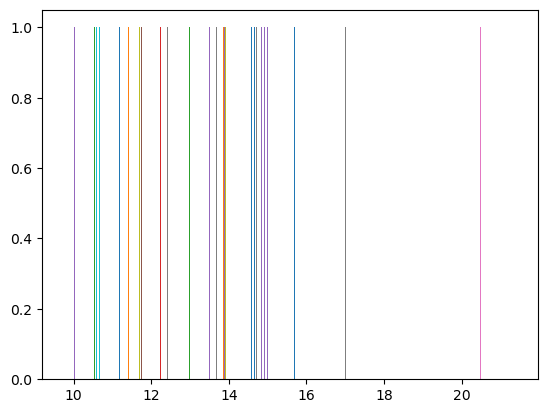

In [13]:
# I think that there are many values that are not being filtered even thought they have many NaNs...

# get columns with more than 90% NaNs
nan_threshold = 0.9
nan_mask = df.isnull().mean() > nan_threshold
plt.hist(df.loc[:, nan_mask])
plt.show()

In [ ]:
# single value or 0

In [ ]:
#ok, so the issue is that the filtering is not working as expected, we need to check the filtering function